In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
data=pd.read_csv('jena_climate_2009_2016.csv')
datatest=pd.read_csv('test.csv')
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
dates_input = pd.to_datetime(data['Date Time'])
print(dates_input.tail(15)) #Check last few dates. 
dates_test = pd.to_datetime(datatest['Date Time'])
print(dates_input.tail(15)) #Check last few dates. 

420536   2016-12-31 21:40:00
420537   2016-12-31 21:50:00
420538   2016-12-31 22:00:00
420539   2016-12-31 22:10:00
420540   2016-12-31 22:20:00
420541   2016-12-31 22:30:00
420542   2016-12-31 22:40:00
420543   2016-12-31 22:50:00
420544   2016-12-31 23:00:00
420545   2016-12-31 23:10:00
420546   2016-12-31 23:20:00
420547   2016-12-31 23:30:00
420548   2016-12-31 23:40:00
420549   2016-12-31 23:50:00
420550   2017-01-01 00:00:00
Name: Date Time, dtype: datetime64[ns]
420536   2016-12-31 21:40:00
420537   2016-12-31 21:50:00
420538   2016-12-31 22:00:00
420539   2016-12-31 22:10:00
420540   2016-12-31 22:20:00
420541   2016-12-31 22:30:00
420542   2016-12-31 22:40:00
420543   2016-12-31 22:50:00
420544   2016-12-31 23:00:00
420545   2016-12-31 23:10:00
420546   2016-12-31 23:20:00
420547   2016-12-31 23:30:00
420548   2016-12-31 23:40:00
420549   2016-12-31 23:50:00
420550   2017-01-01 00:00:00
Name: Date Time, dtype: datetime64[ns]


In [6]:
X_train=data.drop(columns=['T (degC)','Date Time'])
y_train=data['T (degC)']
y_train = data['T (degC)'].values.reshape(X_train.shape[0], 1)
X_test=datatest.drop(columns=['T (degC)','Date Time'])
y_test=datatest['T (degC)']
y_test=datatest['T (degC)'].values.reshape(X_test.shape[0], 1)

# Scale both training and testing input data
#sc = StandardScaler()
sc=MinMaxScaler(feature_range=(0,1))
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
#y_train = sc.transform(y_train)
#y_test = sc.transform(y_test)

In [7]:
y_train.shape

(420551, 1)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)
lin_regressor.fit(X_train,y_train)
y_prediction_line=lin_regressor.predict(X_test)
#train_results = pd.DataFrame(data={'Train Predictions':y_prediction_line, 'Actuals':y_test})
#train_results

-0.0008562242363743738


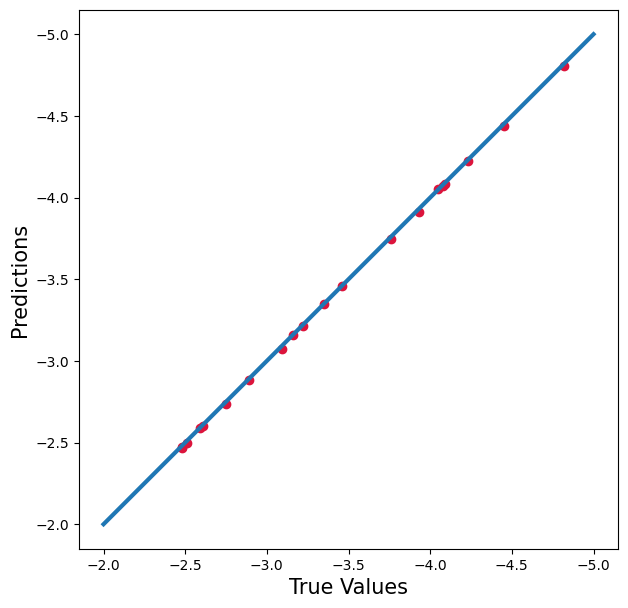

In [9]:
#y_prediction_line_copies=np.repeat(forecast,df_for_training.shape[1], axis=-1)
#y_pred_future=scaler.inverse_transform(forecast_copies)[:,0]
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_prediction_line, c='crimson')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-2,-5],[-2,-5],linewidth=3)
plt.axis('equal')
plt.axis('square')
#plt.savefig("predline.png",dpi=600)

plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
ln=sqrt(mean_squared_error(y_test, y_prediction_line))

print(ln)



0.009834079799377522
